In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(1365, 2048)


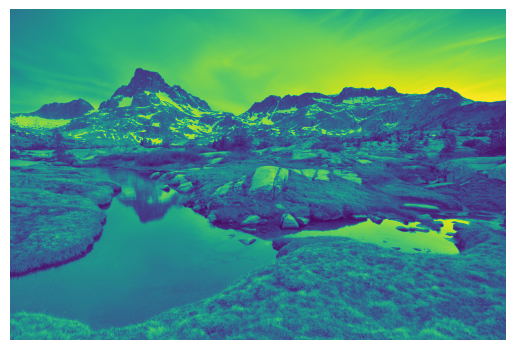

In [27]:
I = cv2.imread("sample2.jpg", 0)
plt.imshow(I);plt.axis("off")
print(I.shape)


In [13]:

# print(Y - 128)
# print(np.subtract(Y, 128).astype(np.uint16))

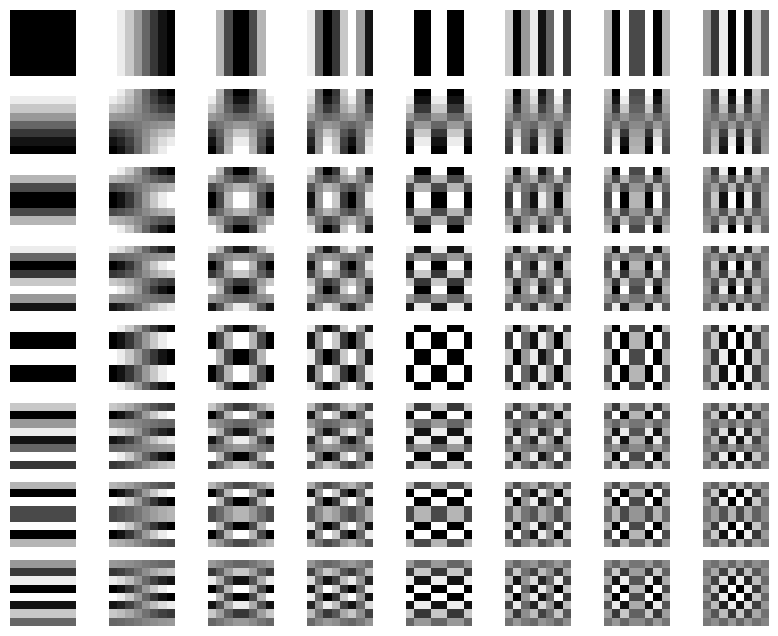

In [14]:
test = np.zeros((8, 8, 8, 8))
for u in range(8):
    for v in range(8):
        for x in range(8):
            for y in range(8):
                test[u, v, x, y] = np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
fig, axes = plt.subplots(8, 8,figsize=(10, 8))
for u in range(8):
    for v in range(8):
        axes[u, v].imshow(test[u, v], cmap="gray")
        axes[u, v].axis("off")
plt.show()

In [15]:
def QQC(degree):
    newQ = np.zeros((8, 8), dtype=np.uint8)
    if 1 < degree < 50 : 
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip((50/degree) * Q[i, j], 0, 255)
        return newQ
    elif 50 < degree < 100:
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip(((100 - degree)/50)*Q[i, j], 0, 255)
        return newQ
    elif degree == 50:return Q
    else :return "sorry but not possible"
Q = np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.uint8)
print(QQC(90))
print(QQC(50))
print(QQC(10))

[[ 3  2  2  3  4  8 10 12]
 [ 2  2  2  3  5 11 12 11]
 [ 2  2  3  4  8 11 13 11]
 [ 2  3  4  5 10 17 16 12]
 [ 3  4  7 11 13 21 20 15]
 [ 4  7 11 12 16 20 22 18]
 [ 9 12 15 17 20 24 24 20]
 [14 18 19 19 22 20 20 19]]
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[ 80  55  50  80 120 200 255 255]
 [ 60  60  70  95 130 255 255 255]
 [ 70  65  80 120 200 255 255 255]
 [ 70  85 110 145 255 255 255 255]
 [ 90 110 185 255 255 255 255 255]
 [120 175 255 255 255 255 255 255]
 [245 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


In [ ]:
def divide_into_blocks(image):
    width, height = image.size
    newDivide = np.zeros((width, height, width*height//64))
    for y in range(0, height, 8):
        for x in range(0, width, 8):
            block = image.crop((x, y, x + 8, y + 8))
            newDivide[..., x] = block
divide_into_blocks(I)

In [ ]:
# test2 = np.zeros((8, 8))
# g_x = 
# for u in range(8):
#   au = 1
#   if u == 0: au = 1/np.sqrt(2)
#   for v in range(8):
#     av = 1
#     if v == 0: av = 1/np.sqrt(2)
#     sumGx = 0
#     for x in range(8):
#         for y in range(8):
#             sumGx = sumGx + g_x[x, y] * np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
#     G = (1/4)*au*av*sumGx
#     test2[u, v] = G

In [ ]:
# width, hieght = test2.shape
# final = np.zeros_like(test2)
# for i in range(hieght):
#     for j in range(width):
#         final = round(test2[i, j]/Q[i, j])